Task 1:

In the Task 1, we have 

$$-Du''+0.5u'=1\ \rm in\ (0,\pi),$$

with the boundary conditions $u(0)=u(\pi)=0.$ The exact solution is

$$u(x)=2\Bigg(x-\frac{\pi\big(\exp(\frac{x}{2D})-1\big)}{\exp(\frac{\pi}{2D})-1}\Bigg).$$

The variational formulation of it says: Find $u\in H_0^1(0,\pi)$ such that

$$D\int_0^\pi u'v'-0.5\int_0^\pi uv'=\int_0^\pi v,\ \forall v\in H_0^1.$$

Now, for FEM, we take $$u_h=\sum_{j=1}^m\zeta_j\phi_j\ ,$$

where,
$\phi_j$'s are the hat functions on [0,$\pi$] and

$$D\sum_{j=1}^m \zeta_j(\phi'_j,\phi'_i)_{L^2(0,\pi)}-0.5\sum_{j=1}^m \zeta_j(\phi_j,\phi'_i)_{L^2(0,\pi)}=\int_0^\pi\phi_i\ ,\forall i=1,2,...,m.$$

$$b_j:=\int_0^\pi\phi_j\ ,\ s_{ij}:=(\phi'_j,\phi'_i)_{L^2(0,\pi)}$$

and,
$$ m_{ij} :=(\phi_j,\phi'_{i})_{L^2(0,\pi)} $$

By calculation by hand, we get

$$ b_{i}=h,\  s_{ii}=2/h,\  s_{i,i+1}=s_{i+1,i}=-1/h\ {\rm and} s_{ij}=0, |i-j|>1$$

$$m_{ii}=0,\  m_{i,i+1}=1/2,\  m_{i+1,i}=-1/2\  {\rm and}\  m_{ij}=0,\  |i-j|>1,$$

where, $h=\frac{\pi}{m+1}$.

Now, we have
$D{\bf S}\zeta-0.5{\bf M}\zeta={\bf b}$, where 
$\zeta=(\zeta_1\ \zeta_2...\zeta_m)^T,\ {\bf S}=(s_{ij})$ is the stiffness matrix, ${\bf M}=(m_{ij})$ and ${\bf b}=(b_1\ b_2\ ...b_m)^T$ is the load vector.










Task 2:

In the Task 2, we have 

$$-u''=f\ \rm in\ (0,1),$$

with the boundary conditions $u(0)=u(1)=0.$ The exact solution is
$u=cg-f\ast g$, where 

$g(x):=x,\ f\ast g(x):=\int_0^xg(x-t)f(t)dt=\int_0^x(x-t)f(t)dt$

and $c=f\ast g(1)=\int_0^1(1-t)f(t)dt$.

Henceforth, we take $f(x)=\pi^2\sin(\pi x)$. Therefore, the exact solution is $u(x)=\sin(\pi x).$

The variational formulation of it says: Find $u\in H_0^1(0,1)$ such that

$$\int_0^1 u'v'=\int_0^1fv,\ \forall v\in H_0^1.$$

Now, for FEM (cG(1)), we take

$$u_h=\sum_{j=1}^m\xi_j\phi_j\ ,$$
where,
$\phi_j$'s are the hat functions on $[0,1]$ and

$$\sum_{j=1}^m \xi_j(\phi'_j,\phi'_i)_{L^2(0,1)}=\int_0^1f\phi_i\ ,\forall i=1,2,...,m.$$ 

$$b_j:=\int_0^1f\phi_j\ ,\ s_{ij}:=
(\phi'_j,\phi'_i)_{L^2(0,1)}$$.

By calculation by hand, we get

$$b_i=\frac{1}{h}\bigg(2\sin(\pi x_i)-\sin(\pi x_{i-1})-\sin(\pi x_{i+1})\bigg),\ s_{ii}=2/h,\ s_{i,i+1}=s_{i+1,i}=-1/h\ {\rm and}\ s_{ij}=0,\ |i-j|>1,$$

 where, $h=\frac{1}{m+1}$ and $x_j=\frac{j}{m+1}$.
 
Now, we have
${\bf S}\xi={\bf b}$, where 
$\xi=(\xi_1\ \xi_2...\xi_m)^T,\ {\bf S}=(s_{ij})$ is the stiffness matrix, and ${\bf b}=(b_1\ b_2\ ...b_m)^T$ is the load vector.

Main result:

The result of part 1 can be seen in figures below for D = 1 and D = 0.1. As can be seen on those graphs, when D = 1 (diffusion dominated), the temperature distribution is symmetrical. When D = 0.1 (convection dominated), the temperature distribution is skewed to the right.

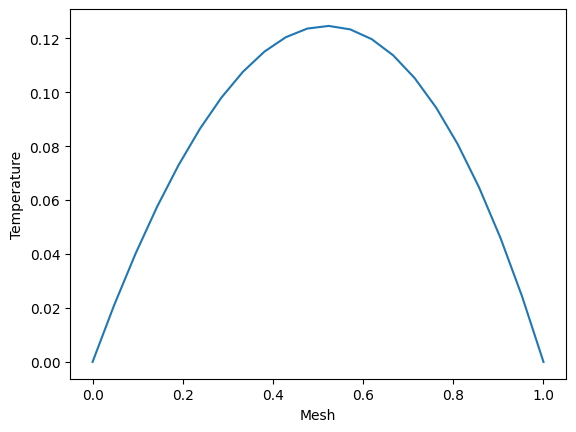

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt 

# Mesh
m_int = 20                        ## Number of internal nodes 
                                  ## (except x_0 and x_m+1)
M   = m_int + 2                   ## Number of total nodes                                  
phi = 1                           ## The boundary on the furthest right (?)
x   = np.linspace (0, phi, M)     ## Mesh with constant interval
h   = 1 / (M - 1)                 ## h

# Diffusion constants
D   = 1

# Array initialization
S   = np.zeros((M,3))             ## Stiffness matrix for the first term
C   = np.zeros((M,3))             ## Stiffness matrix for the second term
                                  ## index 0 for i-1, 1 for i, 2 for i+1
b   = np.zeros((M))               ## Load vector
xi  = np.zeros((M))               ## Unknown vector
u_h = np.zeros((M))               ## Numerical / approximate solution 

# Boundary condition
xi[0]   = 0                       ## xi at x = 0 is equal to zero
xi[M-1] = 0                       ## xi at x = phi is equal to zero

# Compute stiffness matrix S and C and sum both of them to get stiffness
# matrix A (A = S + C)
S[1:M-1,0] = -(D/h)               ## S[i,i-1]
S[1:M-1,1] = 2*(D/h)              ## S[i,i]
S[1:M-1,2] = -(D/h)               ## S[i,i+1]

for i in range (1,M-1):
    ## C[i,i-1]
    C[i,0] = - (1 / (4 * h**2)) * (x[i-1]**2 - 2*x[i-1]*x[i] + x[i]**2) 
    ## C[i,i]
    C[i,1] = (1 / (4 * h**2)) * (x[i-1]**2 - 2*x[i-1]*x[i] + 2*x[i+1]*x[i]
                                - x[i+1]**2)
    ## C[i,i+1]
    C[i,2] =  (1 / (4 * h**2)) * (x[i+1]**2 - 2*x[i+1]*x[i] + x[i]**2)
    
A = S + C

# Compute load vector
for i in range (1,M-1):
    b[i] = (1/(2 * h)) * (2*x[i]**2 - 2*x[i-1]*x[i] - 2*x[i]*x[i+1]
                          + x[i-1]**2 +x[i+1]**2)
    
# Compute xi using Gauss-Seidel method (linear solver)
n_iteration = 10000
for iter in range (n_iteration):
    for i in range (1, M-1):
        xi[i] = (-xi[i-1] * A[i,0] - xi[i+1] * A[i,2] + b[i]) / A[i,1] 

# Approximate solution
u_h = xi
    
# Plot the numerical solution
plt.figure()
plt.plot(x, u_h)
plt.xlabel('Mesh')
plt.ylabel('Temperature')
plt.show()

The result for part 2 can be seen in figure below. As can be seen in the figure, the approximate solution approaches the exact solution as the number of the mesh increases. The error for each mesh size can be seen in the second figure.

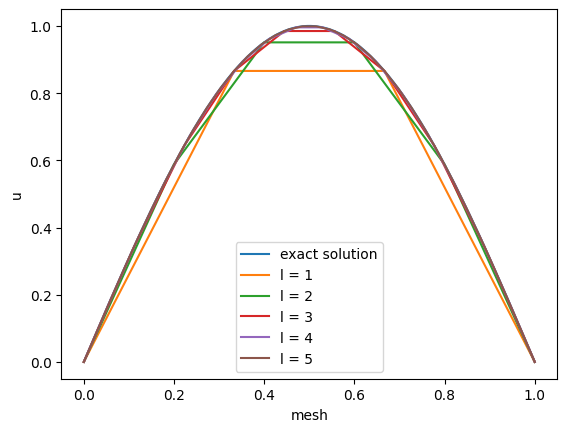

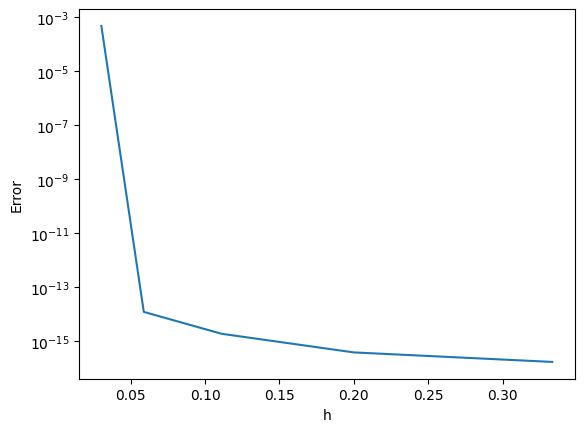

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt 


# EXACT SOLUTION

## Exact function
def u_exact_func(x):
    return np.sin(np.pi * x)

m      = 1001                     ## Number of nodes
xExact = np.linspace (0, 1, m)    ## Mesh with constant interval
h      = 1 / (m-1)                ## h

## Exact solution
u_exact = u_exact_func(xExact) 

# APPROXIMATE SOLUTION

## Error array
err = np.zeros((5))

## Interval array
h = np.zeros((5))


# l = 1
l = 1                             ## l = 1, 2, 3, 4, 5
m = 2 ** l                        ## Number of internal nodes 
                                  ## (except x_0 and x_m+1)
M  = m + 2                        ## Number of total nodes
h[0]  = (1 - 0) / (M - 1)         ## h
x1 = np.linspace(0, 1, M)         ## Mesh with constant interval

### Array initialization
A   = np.zeros((M,3))             #### Stiffness matrix for the first term
                                  #### index 0 for i-1, 1 for i, 2 for i+1
b    = np.zeros((M))              #### Load vector
xi   = np.zeros((M))              #### Unknown vector
u_h1 = np.zeros((M))              #### Numerical / approximate solution 

### Boundary condition
xi[0]   = 0                       #### xi at x = 0 is equal to zero
xi[m-1] = 0                       #### xi at x = phi is equal to zero

### Compute stiffness matrix A
A[1:M-1,0] = -1/h[0]              #### A[i,i-1]
A[1:M-1,1] = 2/h[0]               #### A[i,i]
A[1:M-1,2] = -1/h[0]              #### A[i,i+1]

# Compute load vector
for i in range (1,M-1):
    b[i] = (1 / h[0]) * (2*np.sin(np.pi * x1[i]) - np.sin(np.pi * x1[i-1])
                      - np.sin(np.pi * x1[i+1]))
    
### Compute xi using Gauss-Seidel method (linear solver - iterative)
n_iteration = 1000

for iter in range (n_iteration):
    for i in range (1, M-1):
        xi[i] = (- xi[i-1] * A[i,0] - xi[i+1] * A[i,2] + b[i]) / A[i,1] 

### Approximate solution
u_h1 = xi

### Compute error
err[0] = np.linalg.norm(xi - u_exact_func(x1))


# l = 2
l = 2                             ## l = 1, 2, 3, 4, 5
m = 2 ** l                        ## Number of internal nodes 
                                  ## (except x_0 and x_m+1)
M  = m + 2                        ## Number of total nodes
h[1]  = (1 - 0) / (M - 1)         ## h
x2 = np.linspace(0, 1, M)         ## Mesh with constant interval

### Array initialization
A   = np.zeros((M,3))             #### Stiffness matrix for the first term
                                  #### index 0 for i-1, 1 for i, 2 for i+1
b    = np.zeros((M))              #### Load vector
xi   = np.zeros((M))              #### Unknown vector
u_h2 = np.zeros((M))              #### Numerical / approximate solution 

### Boundary condition
xi[0]   = 0                       #### xi at x = 0 is equal to zero
xi[m-1] = 0                       #### xi at x = phi is equal to zero

### Compute stiffness matrix A
A[1:M-1,0] = -1/h[1]              #### A[i,i-1]
A[1:M-1,1] = 2/h[1]               #### A[i,i]
A[1:M-1,2] = -1/h[1]              #### A[i,i+1]

# Compute load vector
for i in range (1,M-1):
    b[i] = (1 / h[1]) * (2*np.sin(np.pi * x2[i]) - np.sin(np.pi * x2[i-1])
                      - np.sin(np.pi * x2[i+1]))
    
### Compute xi using Gauss-Seidel method (linear solver - iterative)
n_iteration = 1000

for iter in range (n_iteration):
    for i in range (1, M-1):
        xi[i] = (- xi[i-1] * A[i,0] - xi[i+1] * A[i,2] + b[i]) / A[i,1] 

### Approximate solution
u_h2 = xi

### Compute error
err[1] = np.linalg.norm(xi - u_exact_func(x2))


# l = 3
l = 3                             ## l = 1, 2, 3, 4, 5
m = 2 ** l                        ## Number of internal nodes 
                                  ## (except x_0 and x_m+1)
M  = m + 2                        ## Number of total nodes
h[2]  = (1 - 0) / (M - 1)         ## h
x3 = np.linspace(0, 1, M)         ## Mesh with constant interval

### Array initialization
A   = np.zeros((M,3))             #### Stiffness matrix for the first term
                                  #### index 0 for i-1, 1 for i, 2 for i+1
b    = np.zeros((M))              #### Load vector
xi   = np.zeros((M))              #### Unknown vector
u_h3 = np.zeros((M))              #### Numerical / approximate solution 

### Boundary condition
xi[0]   = 0                       #### xi at x = 0 is equal to zero
xi[m-1] = 0                       #### xi at x = phi is equal to zero

### Compute stiffness matrix A
A[1:M-1,0] = -1/h[2]              #### A[i,i-1]
A[1:M-1,1] = 2/h[2]               #### A[i,i]
A[1:M-1,2] = -1/h[2]              #### A[i,i+1]

# Compute load vector
for i in range (1,M-1):
    b[i] = (1 / h[2]) * (2*np.sin(np.pi * x3[i]) - np.sin(np.pi * x3[i-1])
                      - np.sin(np.pi * x3[i+1]))
    
### Compute xi using Gauss-Seidel method (linear solver - iterative)
n_iteration = 1000

for iter in range (n_iteration):
    for i in range (1, M-1):
        xi[i] = (- xi[i-1] * A[i,0] - xi[i+1] * A[i,2] + b[i]) / A[i,1] 

### Approximate solution
u_h3 = xi

### Compute error
err[2] = np.linalg.norm(xi - u_exact_func(x3))


# l = 4
l = 4                             ## l = 1, 2, 3, 4, 5
m = 2 ** l                        ## Number of internal nodes 
                                  ## (except x_0 and x_m+1)
M  = m + 2                        ## Number of total nodes
h[3]  = (1 - 0) / (M - 1)         ## h
x4 = np.linspace(0, 1, M)         ## Mesh with constant interval

### Array initialization
A   = np.zeros((M,3))             #### Stiffness matrix for the first term
                                  #### index 0 for i-1, 1 for i, 2 for i+1
b    = np.zeros((M))              #### Load vector
xi   = np.zeros((M))              #### Unknown vector
u_h4 = np.zeros((M))              #### Numerical / approximate solution 

### Boundary condition
xi[0]   = 0                       #### xi at x = 0 is equal to zero
xi[m-1] = 0                       #### xi at x = phi is equal to zero

### Compute stiffness matrix A
A[1:M-1,0] = -1/h[3]              #### A[i,i-1]
A[1:M-1,1] = 2/h[3]               #### A[i,i]
A[1:M-1,2] = -1/h[3]              #### A[i,i+1]

# Compute load vector
for i in range (1,M-1):
    b[i] = (1 / h[3]) * (2*np.sin(np.pi * x4[i]) - np.sin(np.pi * x4[i-1])
                      - np.sin(np.pi * x4[i+1]))
    
### Compute xi using Gauss-Seidel method (linear solver - iterative)
n_iteration = 1000

for iter in range (n_iteration):
    for i in range (1, M-1):
        xi[i] = (- xi[i-1] * A[i,0] - xi[i+1] * A[i,2] + b[i]) / A[i,1] 

### Approximate solution
u_h4 = xi

### Compute error
err[3] = np.linalg.norm(xi - u_exact_func(x4))


# l = 5
l = 5                             ## l = 1, 2, 3, 4, 5
m = 2 ** l                        ## Number of internal nodes 
                                  ## (except x_0 and x_m+1)
M  = m + 2                        ## Number of total nodes
h[4]  = (1 - 0) / (M - 1)         ## h
x5 = np.linspace(0, 1, M)         ## Mesh with constant interval

### Array initialization
A   = np.zeros((M,3))             #### Stiffness matrix for the first term
                                  #### index 0 for i-1, 1 for i, 2 for i+1
b    = np.zeros((M))              #### Load vector
xi   = np.zeros((M))              #### Unknown vector
u_h5 = np.zeros((M))              #### Numerical / approximate solution 

### Boundary condition
xi[0]   = 0                       #### xi at x = 0 is equal to zero
xi[m-1] = 0                       #### xi at x = phi is equal to zero

### Compute stiffness matrix A
A[1:M-1,0] = -1/h[4]              #### A[i,i-1]
A[1:M-1,1] = 2/h[4]               #### A[i,i]
A[1:M-1,2] = -1/h[4]              #### A[i,i+1]

# Compute load vector
for i in range (1,M-1):
    b[i] = (1 / h[4]) * (2*np.sin(np.pi * x5[i]) - np.sin(np.pi * x5[i-1])
                      - np.sin(np.pi * x5[i+1]))
    
### Compute xi using Gauss-Seidel method (linear solver - iterative)
n_iteration = 1000

for iter in range (n_iteration):
    for i in range (1, M-1):
        xi[i] = (- xi[i-1] * A[i,0] - xi[i+1] * A[i,2] + b[i]) / A[i,1] 

### Approximate solution
u_h5 = xi

### Compute error
err[4] = np.linalg.norm(xi - u_exact_func(x5))

### Plot the result of the exact solution and approximate solution for each l
plt.figure()
plt.plot(xExact, u_exact, label='exact solution')
plt.plot(x1, u_h1, label='l = 1')
plt.plot(x2, u_h2, label='l = 2')
plt.plot(x3, u_h3, label='l = 3')
plt.plot(x4, u_h4, label='l = 4')
plt.plot(x5, u_h5, label='l = 5')
plt.xlabel('mesh')
plt.ylabel('u')
plt.legend()
plt.show()

    
### Plot the error for each h
plt.figure()
plt.plot(h, err)
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.show()